<a href="https://colab.research.google.com/github/ludipink21/challenge-telecom-x-1/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd
import requests

# 1.  link RAW
url = "https://raw.githubusercontent.com/ludipink21/challenge-telecom-x-1/refs/heads/main/TelecomX_Data.json"

# 2. Baixando os dados
acesso = requests.get(url)
dados_json = acesso.json()

# 3. Criando o DataFrame (Tabela)
df_bruto = pd.DataFrame(dados_json)

# 4. Verificando se funcionou
df_bruto.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [ ]:
# Passo 1: Criar o df_transformação a partir dos dados brutos
df_transformação = pd.json_normalize(dados_json)

# Passo 2: Limpeza (O código que deu erro antes)
df_transformação = df_transformação[df_transformação['Churn'] != ""].copy()

# Passo 3: Converter preços para número
df_transformação['account.Charges.Total'] = pd.to_numeric(df_transformação['account.Charges.Total'], errors='coerce')

# Verificando se agora funcionou
print("Sucesso! A tabela foi criada e limpa.")
df_transformação .head()

Sucesso! A tabela foi criada e limpa.


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#📊 Carga e análise

Distribuição de Clientes (Churn):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


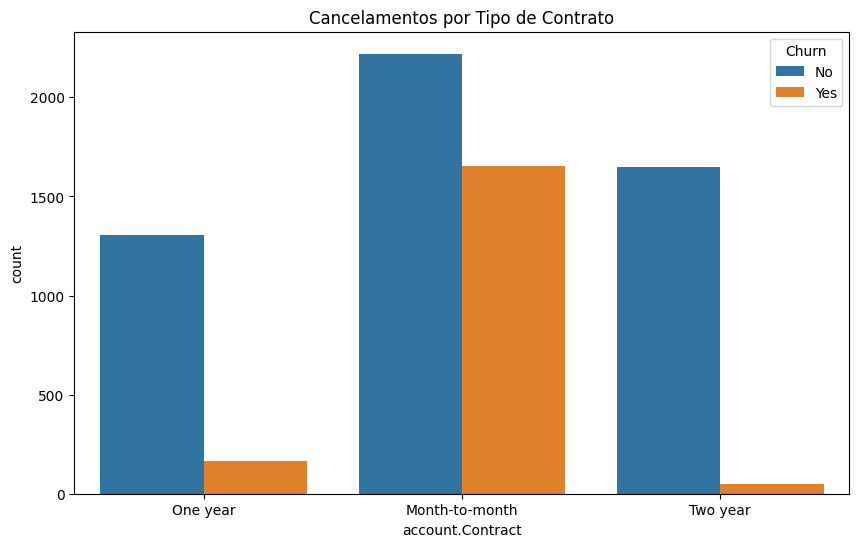

In [ ]:
# Verificando a porcentagem de clientes que saíram (Churn)
print("Distribuição de Clientes (Churn):")
print(df_transformação['Churn'].value_counts(normalize=True) * 100)

# Verificando qual tipo de contrato tem mais desistência
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='account.Contract', hue='Churn', data=df_transformação)
plt.title('Cancelamentos por Tipo de Contrato')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Distribuição de Clientes (Churn):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64
------------------------------


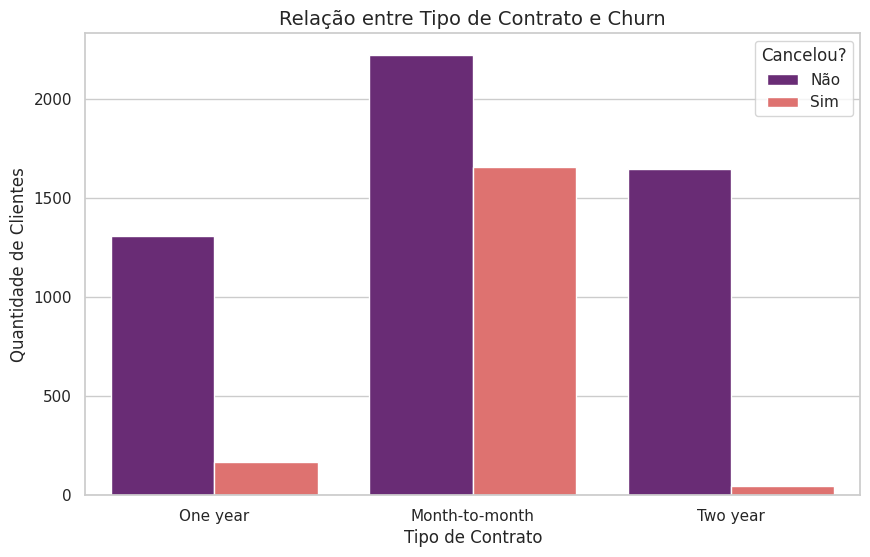

In [ ]:
# --- 1. Análise Numérica (Estatística Descritiva) ---
print("Distribuição de Clientes (Churn):")
print(df_transformação['Churn'].value_counts(normalize=True) * 100)
print("-" * 30)

# --- 2. Análise Visual  ---
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o tamanho e estilo
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Criando o gráfico que relaciona Contrato e Churn
sns.countplot(x='account.Contract', hue='Churn', data=df_transformação, palette='magma')


plt.title('Relação entre Tipo de Contrato e Churn', fontsize=14)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Cancelou?', labels=['Não', 'Sim'])

plt.show()

#📄Relatorio Final

#             Relatório de Análise: Projeto Churn Telecom X


**1.** ***Introdução e Objetivo***

Este projeto consistiu no processo de ETL (Extração, Transformação e Carga) dos dados da Telecom X. O objetivo principal foi identificar os padrões que levam ao Churn (evasão de clientes), transformando dados brutos em insights que auxiliem a equipe de Data Science na criação de modelos preditivos e estratégias de retenção.

**2**. ***Processamento dos Dados (ETL)***
***Extração:***

 Os dados foram coletados em formato JSON via API.

***Transformação:***

 Realizado o desaninhamento (flattening) de objetos JSON complexos para o formato de tabela.

Tratamento de dados nulos e limpeza da coluna alvo (Churn).

Conversão de tipos de dados (ajuste da coluna de cobranças totais para formato numérico).

***Carga:***

Os dados tratados foram estruturados em um DataFrame pronto para análise exploratória.

**3.** ***Análise Exploratória e Insights***

A análise revelou que a Telecom X possui uma taxa de Churn de 26,5%.

                        Principais Descobertas

***Padrão de Contrato:***

Identificamos uma relação direta entre o tipo de contrato e a evasão. Clientes com contratos mensais (Month-to-month) são os que mais cancelam os serviços.

***Estabilidade:***

 Clientes com contratos de longo prazo (1 ou 2 anos) apresentam uma taxa de retenção significativamente maior.

**4**. ***Recomendação Estratégica***


Para reduzir a evasão, recomenda-se que a Telecom X desenvolva campanhas para migrar clientes do plano mensal para planos anuais, utilizando incentivos como descontos progressivos ou benefícios exclusivos de fidelidade.